In [1]:
# Malignent is 1 and Beniegn is -1
def number_classify(diagnosis:str):
    if diagnosis == 'M': 
        return 1
    else: #diagnosis == "B"
        return 0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Classifier

df = pd.read_csv('Cancer_Data.csv', usecols=[1,2,3,4])
df['numb_Diagnosis'] = df['diagnosis'].apply(number_classify)

perim_max = df['perimeter_mean'].max()
radius_max = df['radius_mean'].max()
texture_max = df['texture_mean'].max()

df['texture_mean'] /= texture_max
df['perimeter_mean'] /= perim_max 
df['radius_mean'] /= radius_max


ratio: float = 0.80
split: int = int(ratio * len(df))
learning_df = df[:split]
testing_df = df[split:]

learning_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,numb_Diagnosis
0,M,0.639986,0.264257,0.651459,1
1,M,0.731768,0.452393,0.705040,1
2,M,0.700462,0.540988,0.689655,1
3,M,0.406261,0.518839,0.411565,1
4,M,0.721807,0.365071,0.716711,1


In [3]:
'''LOGISITIC REGRESSOIN'''

log_model = Classifier.Logistic_Regression(['perimeter_mean', 'radius_mean', 'texture_mean'],'numb_Diagnosis')
log_model.Train_Model(learning_df,10000,0.01)


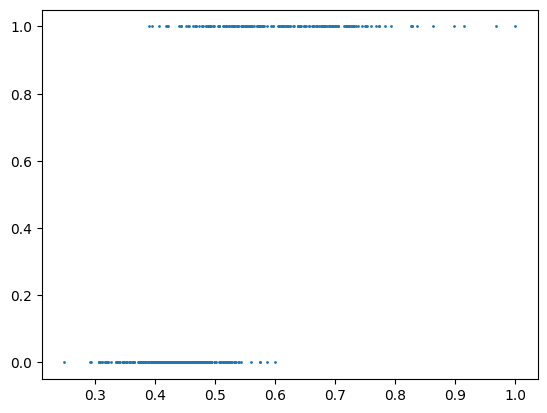

In [ ]:
plt.scatter(learning_df['radius_mean'], learning_df['numb_Diagnosis'], s=1)
plt.show()

In [9]:
print("Accuracy: " + str(log_model.Test_Class(testing_df,0.5)))

print("Prediction: " + str(log_model.Predict([[0.8, 0.5, 0.8]])))

Accuracy: 0.956140350877193
Prediction: [[0.65772672]]
